# Code Review Project 1.2

In [57]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
import re

In [10]:
path = '../code_review3/data'

column_names = ['name', 'gender', 'count']

## Example 1: Compact code

In [37]:
def read_baby_file(fn):
    df = pd.read_csv(os.path.join(path, fn), names=column_names)
    df = df.assign(year=re.search(r'\d{4}', fn).group(0))
    df['year'] = df['year'].astype(int)
    return df

In [38]:
df = pd.concat([read_baby_file(fn) for fn in os.listdir(path)])
df.shape

(2052781, 4)

In [39]:
df.head(3)

,name,gender,count,year
0,Mary,F,63175,1955
1,Deborah,F,52320,1955
2,Linda,F,51302,1955


## Example 2: Plotting names

In [52]:
celebrities = ['Frida']

df_names = df[df['name'].isin(celebrities)]
df_names.head()

,name,gender,count,year
5412,Frida,F,6,1955
828,Frida,F,347,2007
1295,Frida,F,138,1998
3706,Frida,F,29,1992
9594,Frida,F,6,1982


<AxesSubplot:xlabel='year'>

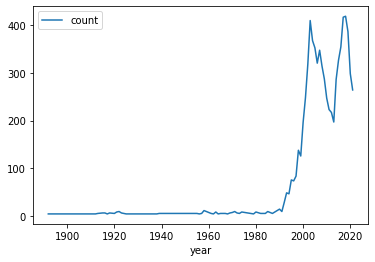

In [53]:
df_names.sort_values('year').set_index('year').plot()

In [58]:
celebrities = ['Frida', 'Arielle', 'Leia']

df_names = df[df['name'].isin(celebrities)]
df_names.head()

,name,gender,count,year
5412,Frida,F,6,1955
5540,Leia,F,6,1955
609,Arielle,F,492,2007
828,Frida,F,347,2007
938,Leia,F,288,2007


<AxesSubplot:xlabel='year', ylabel='count'>

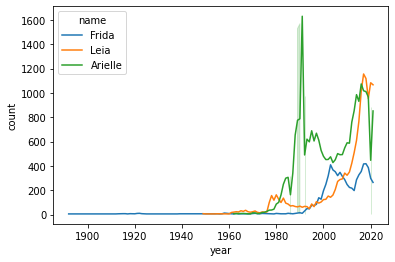

In [61]:
sns.lineplot(data=df_names, x='year', y='count', hue='name')

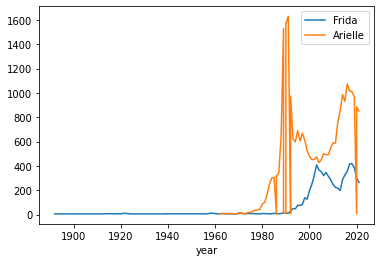

In [72]:
# using matplotlib subplots
# plt.subplot(3, 1, 1)
ax = df_names[df_names['name'] == 'Frida'].sort_values('year').set_index('year').plot()
df_names[df_names['name'] == 'Arielle'].sort_values('year').set_index('year').plot(ax=ax)

ax.legend(celebrities)

<AxesSubplot:xlabel='year'>

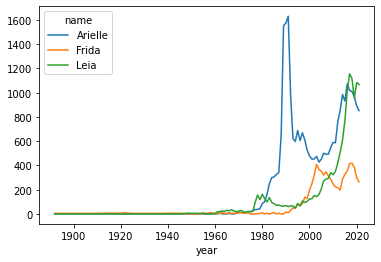

In [79]:
df_names.groupby(['year', 'name'])['count'].sum().unstack().fillna(0).plot()

## Example 3: Normalization

In [100]:
df['total_births'] = df.groupby('year')['count'].transform(sum)
df.head()

,name,gender,count,year,total_births
0,Mary,F,63175,1955,4015136
1,Deborah,F,52320,1955,4015136
2,Linda,F,51302,1955,4015136
3,Debra,F,50564,1955,4015136
4,Susan,F,47421,1955,4015136


In [102]:
name_df = df.loc[df['name'] == 'Sara'].copy()
name_df['percentage'] = (name_df['count'] / name_df['total_births']) * 100

Text(0, 0.5, '% Saras per year')

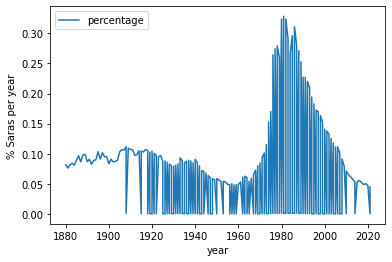

In [103]:
name_df.sort_values(by=['year'], inplace=True)
name_df.plot.line(x='year', y='percentage')
plt.ylabel('% Saras per year')

## Descriptive Statistics: Example

In [82]:
penguins = sns.load_dataset('penguins').dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [89]:
penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [91]:
penguins.corr().round(2)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.00,-0.23,0.65,0.59
bill_depth_mm,-0.23,1.00,-0.58,-0.47
flipper_length_mm,0.65,-0.58,1.00,0.87
body_mass_g,0.59,-0.47,0.87,1.00


<AxesSubplot:>

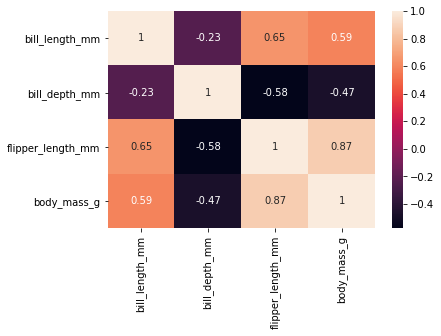

In [94]:
sns.heatmap(penguins.corr(), annot=True)

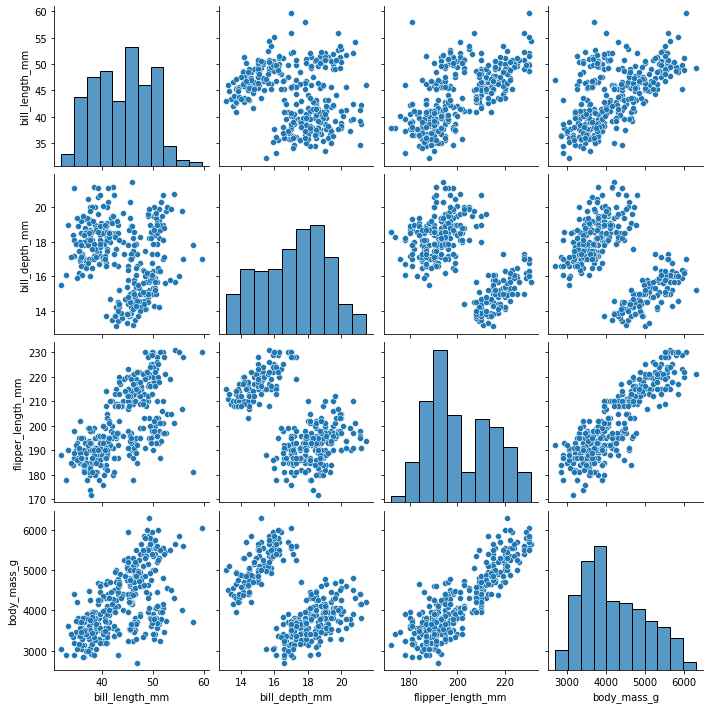

In [93]:
sns.pairplot(penguins)

### Normalization

In [95]:
# 0.0 .. 1.0 scale
penguins['beak_norm'] = penguins['bill_length_mm'] / penguins['bill_length_mm'].max()

<AxesSubplot:ylabel='Frequency'>

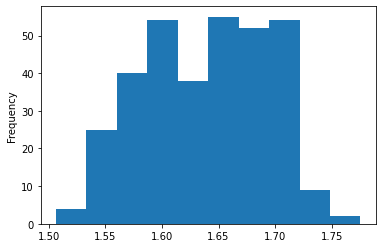

In [99]:
# log norm
import numpy as np

logbeak = np.log10(penguins['bill_length_mm'])
logbeak.plot.hist()

In [106]:
df.head()

,name,gender,count,year,total_births
0,Mary,F,63175,1955,4015136
1,Deborah,F,52320,1955,4015136
2,Linda,F,51302,1955,4015136
3,Debra,F,50564,1955,4015136
4,Susan,F,47421,1955,4015136


In [107]:
name = 'Mary'
name[0]

'M'

In [109]:
name[-1].upper()

'Y'

In [112]:
df['name'].str[:2].value_counts()

Ma    96904
Ja    66232
Ka    52863
Sh    52579
De    47447
      ...  
Nm        1
Bn        1
Mg        1
Lr        1
Uu        1
Name: name, Length: 459, dtype: int64